## **Lab - Correlation Analysis in Python**

**Name:** Gamundoy, Jon Aviv Cloydd S.

**Course and Section:** CPE 019 - CpE32S3

**Date Submitted:** 07/02/2024

**Instructor:** Engr. Roman Richard

## **Objectives**

Part 1: The Dataset

Part 2: Scatterplot Graphs and Correlatable Variables

Part 3: Calculating Correlation with Python

Part 4: Visualizing



## **Scenario/Background**

Correlation is an important statistical relationship that can indicate whether the variable values arelinearly related.

In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset.In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part3, you will use Python to calculate the correlation between two sets of variable.

## **Required Resources**

- 1 PC with Internet access
- Raspberry Pi version 2 or higher
- Python libraries: pandas, numpy, matplotlib, seaborn
- Datafiles: brainsize.txt

## **Part 1: The Dataset**

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychologystudents at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, BlockDesign, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. Theresearchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.Information about gender and body size (height and weight) are also included. The researchers withheldthe weights of two subjects and the height of one subject for reasons of confidentiality. Two simplemodifications were applied to the dataset:

1. Replace the quesion marks used to represent the withheld data points described above by the'NaN' string. The substitution was done because Pandas does not handle the question markscorrectly.

2. Replace all tab characters with commas, converting the dataset into a CSV dataset.
The prepared dataset is saved as
brainsize.txt


.

Step 1: Loading the Dataset From a File.

.

Before the dataset can be used, it must be loaded onto memory.

In the code below, The first line imports the *pandas* modules and defines *pd* as a descriptor that refers tothe module.

The second line loads the dataset CSV file into a variable called *brainFile*

The third line uses *read_csv()*, a *pandas* method, to convert the CSV dataset stored in *brainFile* into adataframe. The dataframe is then stored in the *brainFrame* variable.

.

Run the cell below to execute the described functions.

In [ ]:
# Code cell 1
import pandas as pd

# Import .txt file in the colab
brainFile = 'brainsize.txt'

# Read the file and store it on 'brainFrame' variable
brainFrame = pd.read_csv(brainFile, sep = '\t')
# The parameter "sep" seperates the text based on the given value, in this case the tab character between data.
# After seperating the data, each seperation contains a ',' character making the file similar to a .csv file format

Step 2: Verifying the dataframe.

To make sure the dataframe has been correctly loaded and created, use the *head()* method. AnotherPandas method, *head()* displays the first five entries of a dataframe.

In [ ]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## **Part 2: Scatterplot Graphs and Correlatable Variables**

Step 1: The pandas *describe()* method.

.

The pandas module includes the *describe()* method which performs same common calculationsagainst a given dataset. In addition to provide common results including count, mean, standarddeviation, minimum, and maximum, *describe()*
is also a great way to quickly test the validity of the values in the dataframe.


Run the cell below to output the results computed by *describe()* against the *brainFrame* dataframe.

In [ ]:
# Code cell 3
brainFrame.describe()

# The describe function performs common calculations such as count, mean, standard deviation, minimum value, maximum value, etc.

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visualverification of the nature of the relationship between the variables. This lab uses the Pearson correlationcoefficient, which is sensitive only to a linear relationship between two variables. Other more robustcorrelation methods exist but are out of the scope of this lab.

.

a. Load the required modules.

.

Before graphs can be plotted, it is necessary to import a few modules, namely *numpy* and *matplotlib*.

Run the cell below to load these modules.

In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.

To ensure the results do not get skewed because of the differences in male and female bodies, thedateframe is split into two dataframes: one containing all male entries and another with only femaleinstances.

Running the cell below creates the two new dataframes, menDf and womenDf, each one containing therespective entries.

In [ ]:
# Code cell 5
# Create two dataframes filtered based on Gender by selecting a dataframe (brainFrame), then indicating what parameter to filter from (Gender) and what data to filter (Male/Female)

# Men
menDf = brainFrame[(brainFrame.Gender=='Male')]

# Women
womenDf = brainFrame[(brainFrame.Gender=='Female')]

c. Plot the graphs.

Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first linebelow uses Pandas *mean()* method to calculate the mean value between the three and store the result inthe *menMeanSmarts*
variable. Notice that the first line also refers to the menDf, the filtered dataframecontaining only male entries.

The second line uses the *matplotlib* method *scatter()* to create a scatterplot graph between the *menMeanSmarts* variable and the *MRI_Count* attribute. The MRI_Count in this dataset can be thought as ofa measure of the physical size of the subjects' brains.


The third line simply displays the graph.


The fourth line is used to ensure the graph will be displayed in this notebook.

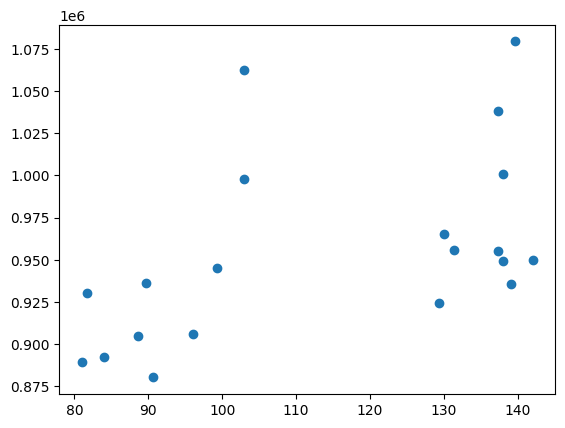

In [ ]:
# Code cell 6

# Get the mean of the PIQ, FSIQ, and VIQ of the men dataframe
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# Plot the results against the mean result and MRI count of the same dataframe
plt.scatter(menMeanSmarts,menDf["MRI_Count"])

# Show the results
plt.show()

# Display on notebook, not necessary on python compilers or later versions of notebook
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

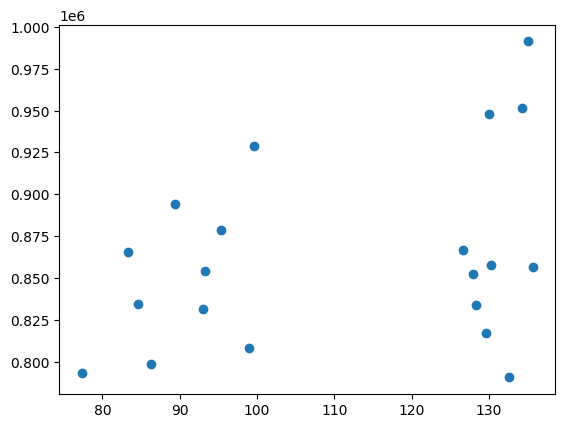

In [ ]:
# Code cell 7
# Graph the women-only filtered dataframe

# Get the mean between the PIQ, FSIQ, and VIQ

# Note: The axis paramter indicates which part of the matrix to consider for calculation
# axis 0 indicates the data between columns while axis 1 refers to data between rows
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# Plot the results against MRI count of the women dataframe
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

# Show the results
plt.show()
%matplotlib inline

## **Part 3: Calculating Correlation with Python**

Step 1: Calculate correlation against brainFrame.

The pandas *corr()* method provides an easy way to calculate correlation against a dataframe. By simplycalling the method against a dataframe, one can get the correlation between all variables at the same time.

In [ ]:
# Code cell 8

# Calculate correlation in the dataframe using the corr() function and with the method as a parameter
# Other methods include: Spearman and Kendall correlation methods
brainFrame.corr(method='pearson')

<ipython-input-17-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


**Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled with 1s? Is that a coincidence? Explain.**
  - It is not a coincidence. The values are filled with 1 because each cell in a row has a 'correlation value' with its respective column. Since FSIQ is both present in row and column, the intersecting cell has direct correlation to itself. This also applies to other elements such as VIQ, PIQ, Weight, etc. to themselves.



**Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.**
  - No, it is not a coincidence. The values are mirrored because it is the correlation of the same two elements in the table. The correlation between FSIQ and VSIQ is the same whether you are looking at either variables.


Using the same *corr()* method, it is easy to calculate the correlation of the variables contained in thefemale-only dataframe:

In [ ]:
# Code cell 9
brainFrame.corr(method='pearson')

<ipython-input-18-033373ce3417>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
# Code cell 10
brainFrame.corr(method='pearson')

<ipython-input-19-ae9d49a6cca4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


## **Part 4: Visualizing**

Step 1: Install Seaborn.

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on coloredsquares, heatmap graphs can help identify correlations in a glance.

The Python module named *seaborn* makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the *seaborn* module.

In [ ]:
# Code cell 11
!pip install seaborn

Step 2: Plot the correlation heatmap.

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in thecell below:

Line 1: Generates a correlation table based on the *womenNoGenderDf* dataframe and stores it on *wcorr*.


Line 2: Uses the *seaborn* heatmap() method to generate and plot the heatmap. Notice that *heatmap()* takes *wcorr* as a parameter.


Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (ithas the comment *#* character preceding it, forcing the interpreter to ignore it), it was kept forinformational purposes.

<ipython-input-21-2465c40f5efb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

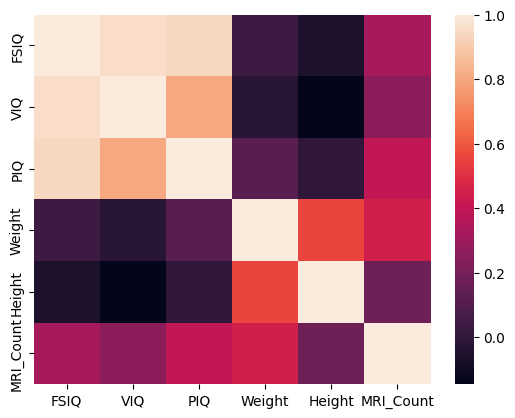

In [ ]:
# Code cell 12
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-22-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

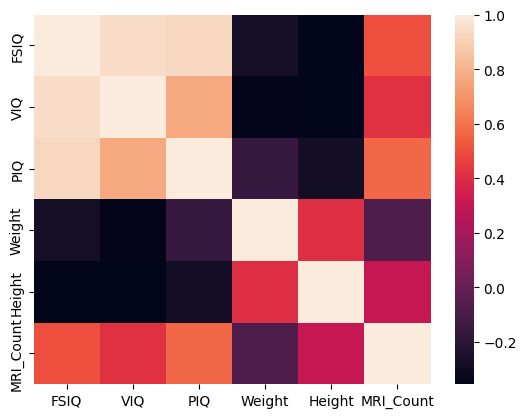

In [ ]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?
- This means that these variable pairs have little to no correlation to each other. A good example is Weight and Height's correlation to IQ of a person. This means that both Height and Weight have little to no effect on a person's intelligence however has slight correlation on their brain size.

Why separate the genders?
- This is because gender is not part of our correlation testing and their varying values of IQ, Weight, and Height might skewer our results.
- Another reason is that calculations are done with numerical values and string variables such as Male and Female might damage our data.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.
- It is showns that a person's IQ type has stronger correlation than a person's Weight or Height. This is to be expected as weight and height aren't common factors you would consider when determining brain size, this activity has proven that.


## Supplementary Activity

Look for (any) real-world dataset and perform exploratory and statistical analysis

In [ ]:
postureFile = 'posture.txt'
rawdataFrame = pd.read_csv(postureFile, sep = '\t')
rawdataFrame.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,POSTURE
0,53,62,125,Female,Low,A
1,52,69,157,Male,High,B
2,30,69,200,Male,High,A
3,51,66,175,Male,Moderate,D
4,45,63,199,Female,Moderate,A


In [ ]:
# Create a function to quickly replace texts
def replace(file, sourcetext, replacedtext):
  stext = sourcetext
  rtext = replacedtext
  file = file.replace(stext, rtext)
  return file

In [ ]:
# Create a loop that will replace the text with numerical values

# Di ko po nagawa Sir

dataFrame = replace(rawdataFrame, "Low", 1)
dataFrame = replace(dataFrame, "Moderate", 2)
dataFrame = replace(dataFrame, "High", 3)

dataFrame = replace(dataFrame, "A", 1)
dataFrame = replace(dataFrame, "B", 2)
dataFrame = replace(dataFrame, "C", 3)
dataFrame = replace(dataFrame, "D", 4)

dataFrame.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,POSTURE
0,53,62,125,Female,1,1
1,52,69,157,Male,3,2
2,30,69,200,Male,3,1
3,51,66,175,Male,2,4
4,45,63,199,Female,2,1


In [ ]:
men = dataFrame[(dataFrame.SEX == 'Male')]
women = dataFrame[(dataFrame.SEX == 'Female')]

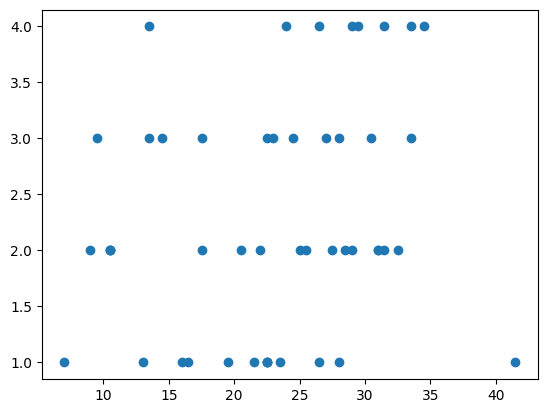

In [ ]:
# Plot the results
menPosture = men[["AGE", "ACTIVITY LEVEL"]].mean(axis=1)
plt.scatter(menPosture, men["POSTURE"])
plt.show()
%matplotlib inline

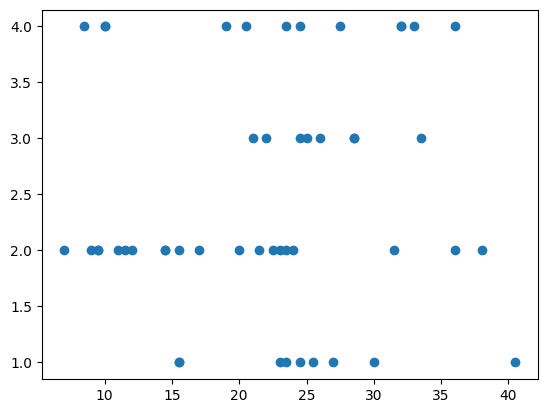

In [ ]:
womenPosture = women[["AGE", "ACTIVITY LEVEL"]].mean(axis=1)
plt.scatter(womenPosture, women["POSTURE"])
plt.show()
%matplotlib inline

In [ ]:
# Compute the correlation using pearsons method
dataFrame.corr(method='pearson')

<ipython-input-96-e6f079c62cd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr(method='pearson')


,AGE,HEIGHT,WEIGHT,ACTIVITY LEVEL,POSTURE
AGE,1.000000,-0.029032,0.272758,-0.276924,0.136133
HEIGHT,-0.029032,1.000000,0.550871,0.167003,0.039402
WEIGHT,0.272758,0.550871,1.000000,-0.031022,-0.149465
ACTIVITY LEVEL,-0.276924,0.167003,-0.031022,1.000000,-0.222198
POSTURE,0.136133,0.039402,-0.149465,-0.222198,1.000000


In [ ]:
men.corr(method='pearson')

,AGE,HEIGHT,WEIGHT,ACTIVITY LEVEL,POSTURE
AGE,1.000000,0.096943,0.345736,-0.420939,0.220811
HEIGHT,0.096943,1.000000,0.373604,-0.008010,0.313204
WEIGHT,0.345736,0.373604,1.000000,-0.274446,-0.089441
ACTIVITY LEVEL,-0.420939,-0.008010,-0.274446,1.000000,-0.267235
POSTURE,0.220811,0.313204,-0.089441,-0.267235,1.000000


In [ ]:
women.corr(method='pearson')

<ipython-input-98-656004c3a768>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  women.corr(method='pearson')


,AGE,HEIGHT,WEIGHT,ACTIVITY LEVEL,POSTURE
AGE,1.000000,-0.271678,0.223989,-0.142600,0.068906
HEIGHT,-0.271678,1.000000,0.393120,0.106364,-0.166829
WEIGHT,0.223989,0.393120,1.000000,-0.044160,-0.168874
ACTIVITY LEVEL,-0.142600,0.106364,-0.044160,1.000000,-0.126745
POSTURE,0.068906,-0.166829,-0.168874,-0.126745,1.000000


<ipython-input-99-e17f84ebeefe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenheat = women.corr()


<Axes: >

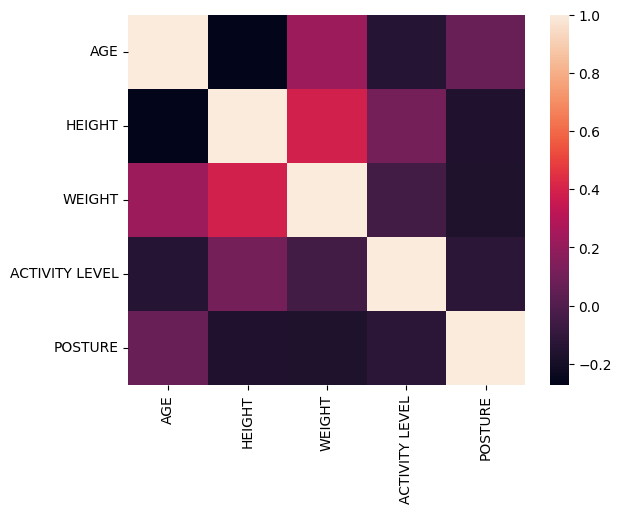

In [ ]:
# Display the heatmap to visualize correlation

womenheat = women.corr()
sns.heatmap(womenheat)

<ipython-input-100-e4a89e20bc83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menheat = men.corr()


<Axes: >

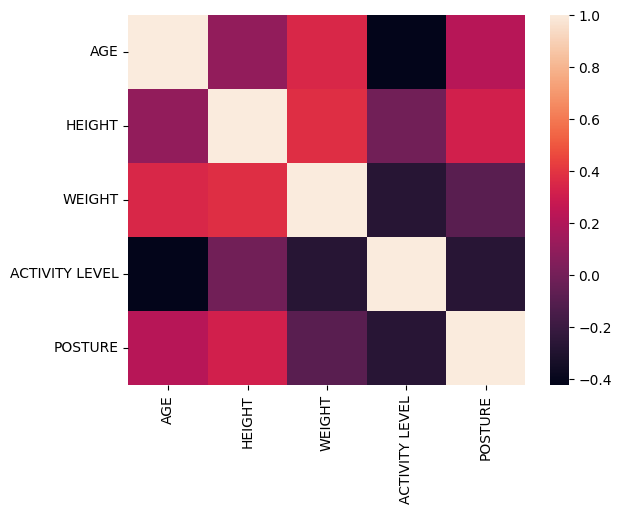

In [ ]:
menheat = men.corr()
sns.heatmap(menheat)

## Conclusion

To conclude, we can say that posture has slight correlation to a person's age and height while not having much correlation on their weight.

I also observed that correlations need numerical values and does not accept string variables such as "Male", "Female" or "Moderate", etc.